In [1]:
import pandas as pd

In [2]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")
pref["日付"] = pd.to_datetime(pref["日付"] )
print(len(pref))
pref.tail()

23312


,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計
23307,2021-05-21,47,沖縄県,207,14694,1,148
23308,2021-05-22,47,沖縄県,231,14925,0,148
23309,2021-05-23,47,沖縄県,156,15081,0,148
23310,2021-05-24,47,沖縄県,104,15185,0,148
23311,2021-05-25,47,沖縄県,256,15441,0,148


In [3]:
all_jp = pref.groupby(["都道府県名"], as_index=False).sum()
del all_jp["各地の感染者数_累計"]
del all_jp["各地の死者数_累計"]
#all_jp = all_jp.rename(columns={"各地の感染者数合計":"各地の感染者数_1日ごとの発表数"})
all_jp = all_jp.rename(columns={"各地の感染者数_1日ごとの発表数":"各地の感染者数合計"})
all_jp = all_jp.rename(columns={"各地の死者数_1日ごとの発表数":"各地の死者数合計"})
all_jp.tail()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計
42,静岡県,10912,8049,134
43,香川県,18352,1960,24
44,高知県,19344,1310,20
45,鳥取県,15376,462,2
46,鹿児島県,22816,3177,29


## 都道府県ごとの最新データを付与

In [4]:
# 直近１週間の感染者数
pref["直近1週間の感染者数"] = pref["各地の感染者数_1日ごとの発表数"].rolling(7).sum()
pref.tail(7)

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,直近1週間の感染者数
23305,2021-05-19,47,沖縄県,203,14289,0,146,928.0
23306,2021-05-20,47,沖縄県,198,14487,1,147,1000.0
23307,2021-05-21,47,沖縄県,207,14694,1,148,1073.0
23308,2021-05-22,47,沖縄県,231,14925,0,148,1144.0
23309,2021-05-23,47,沖縄県,156,15081,0,148,1222.0
23310,2021-05-24,47,沖縄県,104,15185,0,148,1267.0
23311,2021-05-25,47,沖縄県,256,15441,0,148,1355.0


### 感染者数前日比

In [5]:
import numpy as np
pref["新規感染者数前日比"] = pref["各地の感染者数_1日ごとの発表数"].pct_change()
# 一番古い日付だけNANを設定
pref.loc[pref["日付"]==pref["日付"].min(),"新規感染者数前日比"] = np.nan
pref["直近1週間の新規感染者数前日比平均"] = pref["新規感染者数前日比"].rolling(7).mean()
pref.tail()

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均
23307,2021-05-21,47,沖縄県,207,14694,1,148,1073.0,0.045455,0.216365
23308,2021-05-22,47,沖縄県,231,14925,0,148,1144.0,0.115942,0.205210
23309,2021-05-23,47,沖縄県,156,15081,0,148,1222.0,-0.324675,0.232042
23310,2021-05-24,47,沖縄県,104,15185,0,148,1267.0,-0.333333,0.219221
23311,2021-05-25,47,沖縄県,256,15441,0,148,1355.0,1.461538,0.164090


In [6]:
latest = pref.loc[pref["日付"]==pref["日付"].max()][["都道府県名","直近1週間の感染者数","新規感染者数前日比","直近1週間の新規感染者数前日比平均"]]
latest.head()

,都道府県名,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均
495,北海道,4100.0,0.254098,0.001996
991,青森県,203.0,0.700000,0.256977
1487,岩手県,108.0,0.444444,0.048143
1983,宮城県,147.0,1.250000,0.028435
2479,秋田県,39.0,7.000000,0.804332


In [7]:
all_jp = pd.merge(all_jp, latest, on="都道府県名")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均
0,三重県,11904,4743,103,213.0,2.111111,0.152091
1,京都府,12896,15511,203,626.0,0.631579,-0.022739
2,佐賀県,20336,2438,18,159.0,0.454545,0.062603
3,兵庫県,13888,39084,1120,1173.0,0.616279,-0.014998
4,北海道,496,35406,1025,4100.0,0.254098,0.001996


## 人口データを付与

In [8]:
pop = pd.read_excel("COVID-19-jp/2001stjin.xls",header=3)[["Unnamed: 1","計"]]
pop.rename(columns={"Unnamed: 1":"都道府県名"},inplace=True)
pop.rename(columns={"計":"人口"},inplace=True)
pop = pop.loc[pop["都道府県名"]!="合計"].reset_index(drop=True)

In [9]:
all_jp = pd.merge(all_jp, pop, on="都道府県名", how="left")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口
0,三重県,11904,4743,103,213.0,2.111111,0.152091,1813859
1,京都府,12896,15511,203,626.0,0.631579,-0.022739,2545899
2,佐賀県,20336,2438,18,159.0,0.454545,0.062603,823810
3,兵庫県,13888,39084,1120,1173.0,0.616279,-0.014998,5549568
4,北海道,496,35406,1025,4100.0,0.254098,0.001996,5267762


## 人口当たりの感染者数

In [10]:
all_jp["１万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 10000)
all_jp["10万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 100000)
all_jp["直近1週間の10万人当たりの感染者数"] = all_jp["直近1週間の感染者数"] / (all_jp["人口"] / 100000)
all_jp.sort_values("都道府県コード")

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
4,北海道,496,35406,1025,4100.0,0.254098,0.001996,5267762,67.212604,672.126038,77.831914
41,青森県,992,2212,28,203.0,0.700000,0.256977,1275783,17.338372,173.383718,15.911797
19,岩手県,1488,1365,43,108.0,0.444444,0.048143,1235517,11.048007,110.480066,8.741280
11,宮城県,1984,8755,82,147.0,1.250000,0.028435,2292385,38.191665,381.916650,6.412535
36,秋田県,2480,750,12,39.0,7.000000,0.804332,985416,7.610999,76.109988,3.957719
15,山形県,2976,1906,38,155.0,-0.285714,-0.060177,1082296,17.610709,176.107091,14.321406
35,福島県,3472,4481,136,193.0,-0.409091,0.019033,1881981,23.810017,238.100172,10.255151
38,茨城県,3968,9478,143,353.0,0.961538,0.181025,2921436,32.442949,324.429493,12.083099
27,栃木県,4464,6136,75,226.0,0.037037,-0.011886,1965516,31.218265,312.182653,11.498253
37,群馬県,4960,7638,130,335.0,0.714286,0.028429,1969439,38.782618,387.826178,17.009920


## 感染者数

### 平均値、中央値

In [11]:
all_jp["各地の感染者数合計"].describe()

count        47.000000
mean      15383.574468
std       28531.898757
min         462.000000
25%        2325.000000
50%        4664.000000
75%        9739.500000
max      157667.000000
Name: 各地の感染者数合計, dtype: float64

### TOP 10

In [12]:
all_jp.sort_values("各地の感染者数合計", ascending=False).reset_index(drop=True).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
0,東京都,6448,157667,2026,4277.0,0.594118,-0.005320,13834925,113.963032,1139.630320,30.914515
1,大阪府,13392,98281,2190,2616.0,0.513889,-0.032424,8849635,111.056558,1110.565577,29.560541
2,神奈川県,6944,60174,871,1857.0,-0.086758,-0.022856,9209442,65.339464,653.394636,20.164088
3,愛知県,11408,45274,730,3605.0,0.489286,-0.000668,7575530,59.763475,597.634753,47.587430
4,埼玉県,5456,43031,778,1158.0,0.542169,-0.004735,7390054,58.228262,582.282619,15.669710
5,兵庫県,13888,39084,1120,1173.0,0.616279,-0.014998,5549568,70.427104,704.271035,21.136780
6,千葉県,5952,36492,669,804.0,0.207317,0.060638,6319772,57.742589,577.425894,12.721978
7,北海道,496,35406,1025,4100.0,0.254098,0.001996,5267762,67.212604,672.126038,77.831914
8,福岡県,19840,33116,427,2250.0,0.020513,-0.053364,5129841,64.555607,645.556071,43.861009
9,京都府,12896,15511,203,626.0,0.631579,-0.022739,2545899,60.925433,609.254334,24.588564


## １万人あたりの感染者数

### 平均値、中央値

In [13]:
all_jp["１万人当たりの感染者数"].describe()

count     47.000000
mean      36.618490
std       25.929789
min        7.536904
25%       19.520800
50%       28.065659
75%       48.534789
max      113.963032
Name: １万人当たりの感染者数, dtype: float64

## 直近１週間の１０万人あたりの感染者数

In [14]:
all_jp.sort_values(["直近1週間の10万人当たりの感染者数"],ascending=False).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
28,沖縄県,23312,15441,148,1355.0,1.461538,0.164090,1481547,104.222141,1042.221408,91.458455
4,北海道,496,35406,1025,4100.0,0.254098,0.001996,5267762,67.212604,672.126038,77.831914
24,愛知県,11408,45274,730,3605.0,0.489286,-0.000668,7575530,59.763475,597.634753,47.587430
34,福岡県,19840,33116,427,2250.0,0.020513,-0.053364,5129841,64.555607,645.556071,43.861009
21,広島県,16864,10001,123,1216.0,0.281553,-0.033509,2826858,35.378502,353.785015,43.015956
18,岡山県,16368,7029,95,655.0,0.414634,-0.071978,1903627,36.924250,369.242504,34.408001
26,東京都,6448,157667,2026,4277.0,0.594118,-0.005320,13834925,113.963032,1139.630320,30.914515
17,岐阜県,10416,8252,153,603.0,0.826087,-0.024203,2032490,40.600446,406.004458,29.668043
9,大阪府,13392,98281,2190,2616.0,0.513889,-0.032424,8849635,111.056558,1110.565577,29.560541
31,石川県,8432,3596,99,304.0,3.391304,0.484655,1139612,31.554599,315.545993,26.675746


## 直近１週間の新規感染者 増加速度

## 増加速度 統計情報

In [15]:
all_jp["直近1週間の新規感染者数前日比平均"].describe()

count    45.000000
mean      0.070719
std       0.170502
min      -0.146552
25%      -0.022739
50%       0.015409
75%       0.093081
max       0.804332
Name: 直近1週間の新規感染者数前日比平均, dtype: float64

### WORST 10(増加速度の早い順)

In [16]:
all_jp.sort_values("直近1週間の新規感染者数前日比平均",ascending=False).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
36,秋田県,2480,750,12,39.0,7.000000,0.804332,985416,7.610999,76.109988,3.957719
31,石川県,8432,3596,99,304.0,3.391304,0.484655,1139612,31.554599,315.545993,26.675746
33,福井県,8928,1027,34,32.0,-0.250000,0.468254,780053,13.165772,131.657721,4.102285
41,青森県,992,2212,28,203.0,0.700000,0.256977,1275783,17.338372,173.383718,15.911797
12,宮崎県,22320,2986,25,125.0,2.400000,0.247718,1095903,27.246937,272.469370,11.406119
20,島根県,15872,512,0,55.0,1.666667,0.235767,679324,7.536904,75.369043,8.096284
44,高知県,19344,1310,20,137.0,0.933333,0.200303,709230,18.470736,184.707359,19.316724
38,茨城県,3968,9478,143,353.0,0.961538,0.181025,2921436,32.442949,324.429493,12.083099
28,沖縄県,23312,15441,148,1355.0,1.461538,0.164090,1481547,104.222141,1042.221408,91.458455
0,三重県,11904,4743,103,213.0,2.111111,0.152091,1813859,26.148670,261.486698,11.742919


### BEST 10(増加速度の遅い順／減少速度の速い順)

In [17]:
all_jp.sort_values("直近1週間の新規感染者数前日比平均",ascending=True).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,新規感染者数前日比,直近1週間の新規感染者数前日比平均,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
39,長崎県,20832,2836,62,63.0,0.000000,-0.146552,1350769,20.995448,209.954478,4.664010
22,徳島県,17856,1624,61,34.0,-0.800000,-0.076531,742505,21.871907,218.719066,4.579094
18,岡山県,16368,7029,95,655.0,0.414634,-0.071978,1903627,36.924250,369.242504,34.408001
15,山形県,2976,1906,38,155.0,-0.285714,-0.060177,1082296,17.610709,176.107091,14.321406
14,山口県,17360,2790,58,284.0,0.160000,-0.057707,1369882,20.366718,203.667177,20.731713
34,福岡県,19840,33116,427,2250.0,0.020513,-0.053364,5129841,64.555607,645.556071,43.861009
30,熊本県,21328,6033,94,448.0,0.645161,-0.050513,1769880,34.087057,340.870567,25.312451
21,広島県,16864,10001,123,1216.0,0.281553,-0.033509,2826858,35.378502,353.785015,43.015956
9,大阪府,13392,98281,2190,2616.0,0.513889,-0.032424,8849635,111.056558,1110.565577,29.560541
17,岐阜県,10416,8252,153,603.0,0.826087,-0.024203,2032490,40.600446,406.004458,29.668043


## グラフ化

In [18]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

In [19]:
all_jp_desc = all_jp.sort_values(["各地の感染者数合計"],ascending=False)
all_jp_desc_10k = all_jp.sort_values(["１万人当たりの感染者数"],ascending=False)
all_jp_desc_100k = all_jp.sort_values(["直近1週間の10万人当たりの感染者数"],ascending=False)

<IPython.core.display.Javascript object>


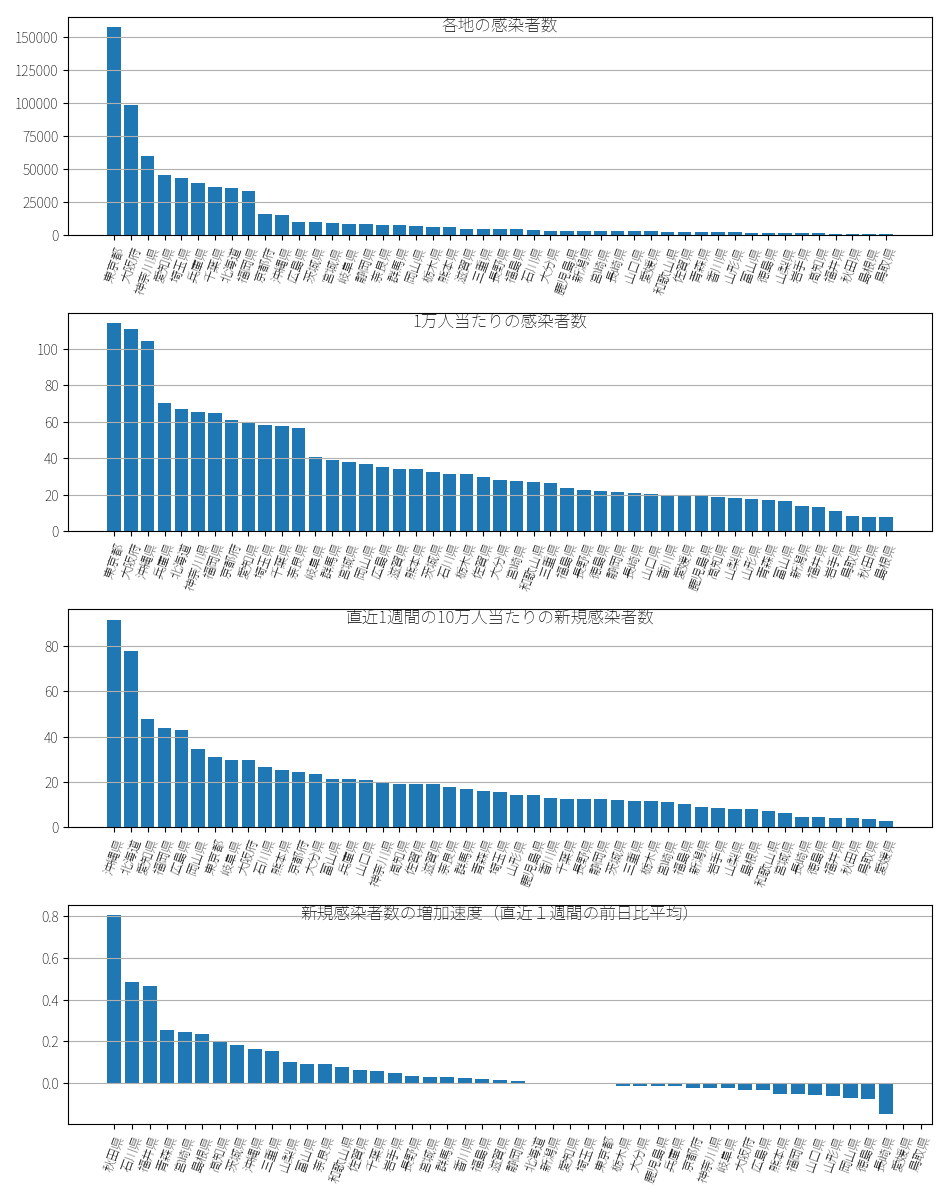

In [20]:
fig = plt.figure(figsize=(9.5,12))
plt.subplot(4,1,1) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.grid(axis="y")
plt.bar(all_jp_desc["都道府県名"], all_jp_desc["各地の感染者数合計"])
plt.title("各地の感染者数", y=0.9)

plt.subplot(4,1,2) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.grid(axis="y")
plt.bar(all_jp_desc_10k["都道府県名"], all_jp_desc_10k["１万人当たりの感染者数"])
plt.title("1万人当たりの感染者数",y=0.9)


plt.subplot(4,1,3) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.grid(axis="y")
plt.bar(all_jp_desc_100k["都道府県名"], all_jp_desc_100k["直近1週間の10万人当たりの感染者数"])
plt.title("直近1週間の10万人当たりの新規感染者数",y=0.9)

### 新規感染者数の増加速度（直近１週間の前日比平均）
plt.subplot(4,1,4) # (rows, columns, panel number)
all_jp_v = all_jp.sort_values("直近1週間の新規感染者数前日比平均",ascending=False)
plt.xticks(rotation="70",fontsize=9)
plt.grid(axis="y")
plt.bar(all_jp_v["都道府県名"], all_jp_v["直近1週間の新規感染者数前日比平均"])
plt.title("新規感染者数の増加速度（直近１週間の前日比平均）",y=0.9)

fig.tight_layout()


## 度数分布表

In [21]:
import numpy as np
data = np.array(all_jp["各地の感染者数合計"])
 
# ヒストグラム
hist, bin_edges = np.histogram(data, bins=8)

print(hist)
print(bin_edges)

[38  4  2  1  1  0  0  1]
[   462.     20112.625  39763.25   59413.875  79064.5    98715.125
 118365.75  138016.375 157667.   ]


## ヒストグラム

<IPython.core.display.Javascript object>


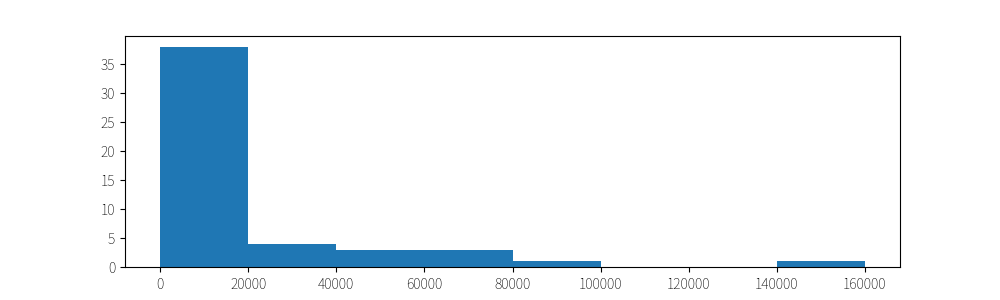

(array([38.,  4.,  3.,  1.,  0.,  0.,  1.]),
 array([     0,  20000,  40000,  80000, 100000, 120000, 140000, 160000]),
 <a list of 7 Patch objects>)

In [22]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["各地の感染者数合計"],bins=[0,20000,40000,80000,100000,120000,140000,160000])

<IPython.core.display.Javascript object>


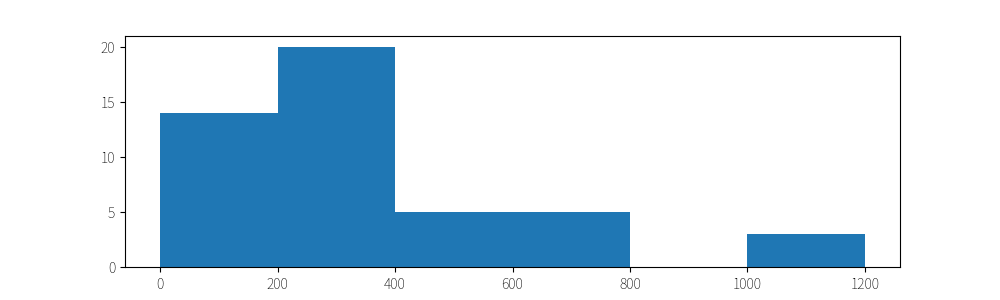

(array([14., 20.,  5.,  5.,  0.,  3.]),
 array([   0,  200,  400,  600,  800, 1000, 1200]),
 <a list of 6 Patch objects>)

In [23]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["10万人当たりの感染者数"],bins=[0,200,400,600,800,1000,1200])
